# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read Dataset

In [ ]:
file_name = f'/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Dataset/clean-detikcom-reviews-2023-01-30-v2.csv'
all_reviews = pd.read_csv(file_name)
all_reviews

,userName,content
0,Alamul Alamul,berita
1,Cucuk Furianto,mantap
2,Benny Wicaksono,selalu yg terdepan terupdate indonesia sy pen...
3,Admin Sadulur,siplaj
4,Aji Brewok,mantap berita nya lugas detil
...,...,...
36972,Pengguna Google,get
36973,Pengguna Google,cukup bagus
36974,Pengguna Google,very good try it
36975,Pengguna Google,fitur widget widgetnya dikembanging donk kasi...


# Sentiment Analyzing

In [ ]:
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

with open('/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Dataset/Leksikon/inset_neg.txt') as f:
    data1A = f.read()
with open('/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Dataset/Leksikon/inset_pos.txt') as f:
    data1B = f.read()

# Membaca leksikon sentiwords_id
with open('/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Dataset/Leksikon/sentiwords_id.txt') as f:
    data2 = f.read()

# Mengubah leksikon sebagai dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)
senti = json.loads(data2)

# Update leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)
sia2.lexicon.update(senti)

print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))
print(reprlib.repr(sia2.lexicon))

{'(barang) bekas': -4, '(olahraga) bokser': -5, '(tua) uzur': -3, 'Anda': -4, ...}
{'(hujan) gerimis': 1, '(warna) dadu': 3, 'Ahad': 3, 'Sri paduka': 4, ...}
{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


## Testing Sentiment

In [ ]:
sample = "kalau kamu sudah sampai sini kamu hebat ayo terus kamu pasti bisa"
print("insetNeg: ", sia1A.polarity_scores(sample))
print("insetPos: ", sia1B.polarity_scores(sample))
print("insetCpdSum: 'compound':", sia1A.polarity_scores(sample)["compound"] + sia1B.polarity_scores(sample)["compound"])

print("senti\t: ", sia2.polarity_scores(sample))

insetNeg:  {'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.875}
insetPos:  {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.9517}
insetCpdSum: 'compound': 0.07669999999999999
senti	:  {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.6124}


## Get the Sentiment Labels

In [ ]:
def sentiment_inset(content):
    result = sia1A.polarity_scores(str(content))["compound"] + sia1B.polarity_scores(str(content))["compound"]
    if result > 0:
        return "positive"
    elif result == 0:
        return "neutral"
    else:
        return "negative"

def sentiment(content):
    result = sia2.polarity_scores(str(content))["compound"]
    if result > 0:
        return "positive"
    elif result == 0:
        return "neutral"
    else:
        return "negative"

In [ ]:
all_reviews['sentiment'] = all_reviews['content'].apply(sentiment)
all_reviews['sentiment_inset'] = all_reviews['content'].apply(sentiment_inset)
all_reviews

,userName,content,sentiment,sentiment_inset
0,Alamul Alamul,berita,neutral,negative
1,Cucuk Furianto,mantap,positive,positive
2,Benny Wicaksono,selalu yg terdepan terupdate indonesia sy pen...,neutral,positive
3,Admin Sadulur,siplaj,neutral,neutral
4,Aji Brewok,mantap berita nya lugas detil,positive,positive
...,...,...,...,...
36972,Pengguna Google,get,neutral,neutral
36973,Pengguna Google,cukup bagus,positive,negative
36974,Pengguna Google,very good try it,neutral,positive
36975,Pengguna Google,fitur widget widgetnya dikembanging donk kasi...,neutral,positive


In [ ]:
all_reviews[1000:1050]

,userName,content,sentiment,sentiment_inset
1000,Makmur Computer,lengkap beritanya wawasan,neutral,negative
1001,Budi Setiawan,berita beritanya terpercaya disajikan bahasa ...,positive,negative
1002,Vincent Barkah,mantap good,positive,positive
1003,Sri Patarwati,selalu ok beritanya akurat,positive,positive
1004,Hardi Ansyah,informasi real time tendensius profesional,neutral,positive
1005,Dicky Riswandy,ok,positive,positive
1006,Agus Wijaya,mantap banget,positive,positive
1007,denzel nuryoso,beritanya up to date dipercaya,positive,neutral
1008,Anwar Shodiq,berita lengkap aktual,neutral,negative
1009,Amat Dimyati,akurat ligas,neutral,neutral


# Data Visualization

## Sentiment with Sentiwords

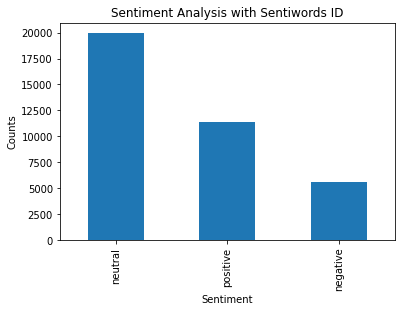

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title('Sentiment Analysis with Sentiwords ID')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
all_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()
file_name = f'/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Visualisasi/Sentiment-with-Sentiwords'
plt.savefig(file_name)

## Sentiment with InSet

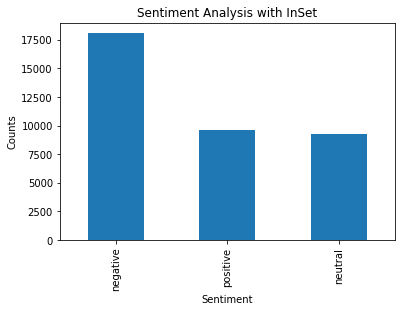

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title('Sentiment Analysis with InSet')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
all_reviews['sentiment_inset'].value_counts().plot(kind = 'bar')
plt.show()
file_name = f'/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Visualisasi/Sentiment-with-InSet'
plt.savefig(file_name)

# Save the Labelled Data

In [ ]:
labelled_data = all_reviews[['userName', 'content', 'sentiment']]
file_name = f'/content/gdrive/MyDrive/Kuliah/Semester 7/AI/UAS/Dataset/labelled-detikcom-reviews-{datetime.date.today()}.csv'
labelled_data.to_csv(file_name, index=False)